### Задача 3.1

Дополните классы функций активаций `Sigmoid` и `ReLU` при помощи инструментов библиотеки `numpy`, следуя предложенному ниже шаблону. Напомним, что:
$$
\sigma(x) = \frac{1}{1+\exp(-x)};
\quad
\operatorname{ReLU}(x)=
\begin{cases}
  x,~x\geq 0,\\
  0,~x<0.
\end{cases}
$$

Установите аналитически область значений каждой из функций

Вычислите аналитически производные обеих функций

Покажите аналитически, что
$$
\frac{\rm d}{{\rm d}x}\sigma(x) = \sigma(x) \cdot \left[1-\sigma(x)\right]
$$

Установите аналитически область значений производной каждой из функций

Определите у обоих классов метод `__call__(self, x)`, который принимает числовой `numpy` массив произвольного размера и возвращает числовой `numpy` массив того же размера, заполненный значениями функции активации в соответствующих точках

Определите у обоих классов метод `derivative(self, x)`, который принимает числовой `numpy` массив произвольного размера и возвращает числовой `numpy` массив того же размера, заполненный значениями производной функции активации в соответствующих точках.$^*$ **Внимание:** данный пункт не оценивается, если не получена аналитическая формула для производных!

Полностью векторизуйте решение (избегайте явного использования циклов и условных операторов)

Предусмотрите обработку некорректных входных данных

При помощи метода `__call__` изобразите в одних осях графики обеих функций активации на отрезке $x\in[-3,\,3]$. Подпишите оси и линии, выберите разумный диапазон значений по вертикальной оси

При помощи метода `derivative` изобразите в одних осях графики производных от обеих функций активации на отрезке $x\in[-3,\,3]$. Подпишите оси и линии, выберите разумный диапазон значений по вертикальной оси. **Внимание:** данный пункт не оценивается, если не получена аналитическая формула для производных!

```python
import numpy as np

class Sigmoid:
    def __init__(self):
        pass

    def __call__(self, x:np.ndarray)->np.ndarray:
        # TO-DO

    def derivative(self, x:np.ndarray)->np.ndarray:
        # TO-DO


class ReLU:
    def __init__(self):
        pass

    def __call__(self, x:np.ndarray)->np.ndarray:
        # TO-DO

    def derivative(self, x:np.ndarray)->np.ndarray:
        # TO-DO
```

---
$^*$Строго говоря, одна из функций активации (какая?) терпит разрыв производной в некоторой точке (в какой?). Для программной реализации доопределите значение производной в этой точке лево- или правосторонним пределом, на ваш выбор


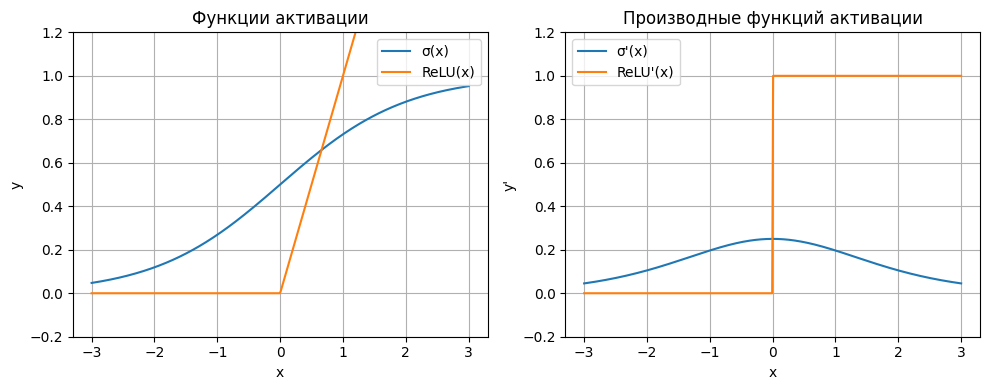

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Класс для определения сигмоида
class Sigmoid:
    def __init__(self):
        pass

    def __call__(self, x: np.ndarray) -> np.ndarray:
        x = np.asarray(x, dtype=float)
        out = np.empty_like(x)
        pos = x >= 0
        neg = ~pos
        out[pos] = 1 / (1 + np.exp(-x[pos]))
        e = np.exp(x[neg])
        out[neg] = e / (1 + e)
        return out
    # Производная
    def derivative(self, x: np.ndarray) -> np.ndarray:
        s = self.__call__(x)
        return s * (1 - s)

# Класс для определения Relu
class ReLU:
    def __init__(self):
        pass

    def __call__(self, x: np.ndarray) -> np.ndarray:
        x = np.asarray(x, dtype=float)
        return np.maximum(0.0, x)

    # Производная
    def derivative(self, x: np.ndarray) -> np.ndarray:
        x = np.asarray(x, dtype=float)
        grad = np.zeros_like(x)
        grad[x > 0] = 1.0
        grad[x == 0] = 0.0
        return grad

z = np.linspace(-3, 3, 400)

sig = Sigmoid()
relu = ReLU()

# Графики функций активации
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(z, sig(z), label="σ(x)")
plt.plot(z, relu(z), label="ReLU(x)")
plt.title("Функции активации")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.ylim(-0.2, 1.2)

# Графики производных
plt.subplot(1, 2, 2)
plt.plot(z, sig.derivative(z), label="σ'(x)")
plt.plot(z, relu.derivative(z), label="ReLU'(x)")
plt.title("Производные функций активации")
plt.xlabel("x")
plt.ylabel("y'")
plt.grid(True)
plt.legend()
plt.ylim(-0.2, 1.2)

plt.tight_layout()
plt.show()


### Задача 3.2

Дополните шаблон класса Perceptron, предложенный ниже. Напомним, что модель перцептрона определяется следующим уравнением:
F(X)i=a(∑j=1dXijwj+b),
где  a(⋅)  — функция активации,  wj  и  b  — параметры, индекс  i  нумерует наблюдения в датасете, индекс  j  — столбцы-признаки  X .

[1 балл] Вычислите аналитически производную  F  по параметрам  wj  и  b

[2 балла] Дополните метод __init__(self, input_size, activation, random_seed). Реализуйте инициализацию параметров модели случайным образом (например, из стандартного нормального или равномерного распределения). Предусмотрите возможность воспроизводимой случайной генерации при помощи аргумента random_seed

[4 балла] Дополните методы forward(self, X) и backward(self, X), которые принимают на вход матрицу признаков X и возвращают выходные значения перцептрона и матрицу производных перцептрона по параметрам  wj  и  b , соответственно. Обратите внимание на требуемые типы данных и требуемый размер выхода (указаны в docstring). Считайте, что у объекта activation должны быть определены методы __call__ и derivative. В случае, когда при инициализации класса указано activation=None, считайте, что функция активации не используется, и перцептрон работает как обычная линейная модель. Внимание: если не получена аналитическая формула для производной  F , то метод backward(self, X) не оценивается!

[1 балл] Полностью векторизуйте решение (избегайте явного использования циклов и условных операторов)

[2 балла] Предусмотрите обработку некорректных входных данных в каждом из методов класса

import numpy as np

class Perceptron:
    def __init__(self, input_size:int=1, activation=None, random_seed=None):

        assert isinstance(input_size, int)
        assert input_size > 0
        # TO-DO: добавьте дополнительные проверки

        self.input_size = input_size
        self.activation = activation
        # TO-DO: инициализируйте параметры нужного размера случайным образом

    def forward(self, X:np.ndarray)->np.ndarray:
        """
        Params
        ------
        X : np.ndarray of shape (n_samples, self.input_size)

        Returns
        -------
        np.ndarray of shape (n_samples,)
        """
        # TO-DO: проверьте корректность входных данных
        # TO-DO: вычислите и верните выходное значение перцептрона

    def backward(self, X:np.ndarray)->np.ndarray:
        """
        Params
        ------
        X : np.ndarray of shape (n_samples, self.input_size)

        Returns
        -------
        np.ndarray of shape (n_samples, self.input_size + 1)
        """
        # TO-DO: проверьте корректность входных данных
        # TO-DO: вычислите и верните градиент выходного значения по параметрам

In [ ]:
import numpy as np

# Класс Перцептрона
class Perceptron:
    def __init__(self, input_size: int = 1, activation=None, random_seed=None):
        # Проверки корректности входных данных
        if not isinstance(input_size, int):
            raise TypeError("input_size должен быть int")
        if input_size <= 0:
            raise ValueError("input_size должен быть положительным")
        # Проверки корректности функции активации
        if activation is not None:
            if not hasattr(activation, "__call__"):
                raise AttributeError("activation должна иметь метод __call__")
            if not hasattr(activation, "derivative"):
                raise AttributeError("activation должна иметь метод derivative")

        # Сохраняем параметры
        self.input_size = input_size
        self.activation = activation

        # Инициализация параметров
        rng = np.random.default_rng(random_seed)
        self.w = rng.normal(scale=1.0 / np.sqrt(input_size), size=(input_size,)).astype(float)
        self.b = float(rng.normal())

    def forward(self, X: np.ndarray) -> np.ndarray:
        # Проверка корректности данных
        if not isinstance(X, np.ndarray):
            raise TypeError("X должен быть numpy.ndarray")
        if X.ndim != 2:
            raise ValueError("X должен быть двумерной матрицей")
        if X.shape[1] != self.input_size:
            raise ValueError(f"X должен иметь {self.input_size} признаков")

        z = X @ self.w + self.b
        # Применение функции активации
        if self.activation is None:
            return z
        else:
            return self.activation(z)

    def backward(self, X: np.ndarray) -> np.ndarray:
        # Проверка корректности данных
        if not isinstance(X, np.ndarray):
            raise TypeError("X должен быть numpy.ndarray")
        if X.ndim != 2:
            raise ValueError("X должен быть двумерной матрицей")
        if X.shape[1] != self.input_size:
            raise ValueError(f"X должен иметь {self.input_size} признаков")

        z = X @ self.w + self.b
        # Производная
        if self.activation is None:
            a_prime = np.ones_like(z)
        else:
            a_prime = self.activation.derivative(z)
        grad = np.concatenate([X * a_prime[:, None], a_prime[:, None]], axis=1)
        return grad

if __name__ == "__main__":
    n_samples = 10
    input_size = 1000
    X = np.random.normal(size=(n_samples, input_size))

    sigmoid = Sigmoid()
    model = Perceptron(input_size=input_size, activation=sigmoid, random_seed=42)

    out = model.forward(X)
    print("Perceptron forward: shape =", out.shape)
    print("Первые 5 выходных значений:", np.round(out[:5], 4))

    grad = model.backward(X)
    print("Perceptron backward: shape =", grad.shape)
    print("Градиент первой выборки:", np.round(grad[0, :5], 4), " ...")

Perceptron forward: shape = (10,)
Первые 5 выходных значений: [0.2566 0.5768 0.6836 0.7307 0.4499]
Perceptron backward: shape = (10, 1001)
Градиент первой выборки: [-0.3129  0.215  -0.3222 -0.2939  0.0472]  ...
